<a href="https://colab.research.google.com/github/Rashiduzzaman2655/Diabetes-Prediction/blob/main/Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path="/content/drive/MyDrive/Colab Notebooks/Research/diabetic_data.csv"
df=pd.read_csv(path)
df.describe

<bound method NDFrame.describe of         encounter_id  patient_nbr  race  ...  change  readmitted  diabetesMed
0            2278392      8222157   4.0  ...       2           3            1
1             149190     55629189   4.0  ...       1           2            2
2              64410     86047875   2.0  ...       2           3            2
3             500364     82442376   4.0  ...       1           3            2
4              16680     42519267   4.0  ...       1           3            2
...              ...          ...   ...  ...     ...         ...          ...
101761     443847548    100162476   2.0  ...       1           2            2
101762     443847782     74694222   2.0  ...       2           3            2
101763     443854148     41088789   4.0  ...       1           3            2
101764     443857166     31693671   4.0  ...       1           3            2
101765     443867222    175429310   4.0  ...       2           3            1

[101766 rows x 48 columns]>

In [ ]:
df.head(10)

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide.metformin,glipizide.metformin,glimepiride.pioglitazone,metformin.rosiglitazone,metformin.pioglitazone,change,readmitted,diabetesMed
0,2278392,8222157,4.0,1,1,6,25,1,1,39.0,41,0,1,0,0,0,126.0,NaN,NaN,1,3,3,2,2,2,2,2,1,2,2,1,2,2,2,2,1,1,1,1,2,2,1,1,1,1,2,3,1
1,149190,55629189,4.0,1,2,1,1,7,3,NaN,59,0,18,0,0,0,145.0,81.0,123.0,9,3,3,2,2,2,2,2,1,2,2,1,2,2,2,2,1,1,1,1,4,2,1,1,1,1,1,2,2
2,64410,86047875,2.0,1,3,1,1,7,2,NaN,11,5,13,2,0,1,456.0,80.0,768.0,6,3,3,2,2,2,2,2,1,3,2,1,2,2,2,2,1,1,1,1,2,2,1,1,1,1,2,3,2
3,500364,82442376,4.0,2,4,1,1,7,2,NaN,44,1,16,0,0,0,556.0,99.0,250.0,7,3,3,2,2,2,2,2,1,2,2,1,2,2,2,2,1,1,1,1,4,2,1,1,1,1,1,3,2
4,16680,42519267,4.0,2,5,1,1,7,1,NaN,51,0,8,0,0,0,56.0,26.0,88.0,5,3,3,2,2,2,2,2,1,3,2,1,2,2,2,2,1,1,1,1,3,2,1,1,1,1,1,3,2
5,35754,82637451,4.0,2,6,2,1,2,3,NaN,31,6,16,0,0,0,265.0,248.0,88.0,9,3,3,2,2,2,2,2,1,2,2,1,2,2,2,2,1,1,1,1,3,2,1,1,1,1,2,2,2
6,55842,84259809,4.0,2,7,3,1,2,4,NaN,70,1,21,0,0,0,265.0,248.0,772.0,7,3,3,3,2,2,2,3,1,2,2,1,2,2,2,2,1,1,1,1,3,2,1,1,1,1,1,3,2
7,63768,114882984,4.0,2,8,1,1,7,5,NaN,73,0,12,0,0,0,278.0,316.0,88.0,8,3,3,2,2,2,2,2,1,2,3,1,2,2,2,2,1,1,1,1,2,2,1,1,1,1,2,2,2
8,12522,48330783,4.0,1,9,2,1,4,13,NaN,68,2,28,0,0,0,254.0,262.0,231.0,8,3,3,2,2,2,2,2,1,3,2,1,2,2,2,2,1,1,1,1,3,2,1,1,1,1,1,3,2
9,15738,63555939,4.0,1,10,3,3,4,12,20.0,33,3,18,0,0,0,284.0,48.0,319.0,8,3,3,2,2,2,2,2,1,2,2,1,2,3,2,2,1,1,1,1,3,2,1,1,1,1,1,3,2


In [ ]:
df.shape

(101766, 48)

In [ ]:
df.dtypes

encounter_id                  int64
patient_nbr                   int64
race                        float64
gender                        int64
age                           int64
admission_type_id             int64
discharge_disposition_id      int64
admission_source_id           int64
time_in_hospital              int64
medical_specialty           float64
num_lab_procedures            int64
num_procedures                int64
num_medications               int64
number_outpatient             int64
number_emergency              int64
number_inpatient              int64
diag_1                      float64
diag_2                      float64
diag_3                      float64
number_diagnoses              int64
max_glu_serum                 int64
A1Cresult                     int64
metformin                     int64
repaglinide                   int64
nateglinide                   int64
chlorpropamide                int64
glimepiride                   int64
acetohexamide               

In [ ]:
df.isna().sum()


encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide                       0
glyburide     

In [ ]:
from sklearn.impute import SimpleImputer
s_imputer=SimpleImputer(missing_values=np.nan, strategy='mean', verbose=0)
s_imputer=s_imputer.fit(df.iloc[:, 2:3])
df.iloc[:, 2:3]=s_imputer.transform(df.iloc[:, 2:3])



In [ ]:
s_imputer=SimpleImputer(missing_values=np.nan, strategy='mean', verbose=0)
s_imputer=s_imputer.fit(df.iloc[:, 9:10])
df.iloc[:, 9:10]=s_imputer.transform(df.iloc[:, 9:10])

In [ ]:
s_imputer=SimpleImputer(missing_values=np.nan, strategy='mean', verbose=0)
s_imputer=s_imputer.fit(df.iloc[:, 16:19])
df.iloc[:, 16:19]=s_imputer.transform(df.iloc[:, 16:19])

In [ ]:
df.isna().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose  

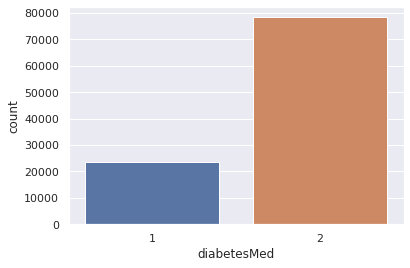

In [ ]:
 sns.set(style="darkgrid")
 ax=sns.countplot(x="diabetesMed", data=df)

In [ ]:
import pandas as pd
from sklearn import preprocessing
x=df.values #returns a numpy array
min_max_scaler=preprocessing.MinMaxScaler()
x_scaled=min_max_scaler.fit_transform(x)
df=pd.DataFrame(x_scaled)
df.head(50)
df.to_excel(r'./Skin.xlsx', sheet_name='Skin', index=False)

In [ ]:
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [ ]:
X_train.shape

(71236, 47)

In [ ]:
Y_test.shape

(30530,)

In [ ]:
import tensorflow as tf
import time
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D,MaxPooling2D, Dropout,Activation
from sklearn.metrics import  confusion_matrix 
from keras.optimizers import Adam, RMSprop, SGD, Adamax, Nadam

In [ ]:
model=Sequential()
model.add(Dense(256,input_dim=47, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.003), activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.003), activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(16, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))

In [ ]:

start = time.time()
model.compile(loss='mse', optimizer='adamax')
print('compilation time: ',time.time() - start)

#compile model
adamax=Adamax(lr=0.001)
model.compile(optimizer="adamax", loss='binary_crossentropy', metrics=['accuracy'])
print(model.summary())

compilation time:  0.01340937614440918
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               12288     
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                2064      
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)  

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
model.fit(X_train,Y_train,batch_size=32,epochs=128,verbose=1,validation_split=0.10)

Epoch 1/128
2004/2004 [==============================] - 18s 2ms/step - loss: 0.3177 - accuracy: 0.9392 - val_loss: 0.0707 - val_accuracy: 0.9996
Epoch 2/128
2004/2004 [==============================] - 4s 2ms/step - loss: 0.0677 - accuracy: 0.9990 - val_loss: 0.0424 - val_accuracy: 1.0000
Epoch 3/128
2004/2004 [==============================] - 4s 2ms/step - loss: 0.0425 - accuracy: 0.9997 - val_loss: 0.0299 - val_accuracy: 1.0000
Epoch 4/128
2004/2004 [==============================] - 4s 2ms/step - loss: 0.0314 - accuracy: 0.9998 - val_loss: 0.0240 - val_accuracy: 1.0000
Epoch 5/128
2004/2004 [==============================] - 4s 2ms/step - loss: 0.0259 - accuracy: 0.9998 - val_loss: 0.0207 - val_accuracy: 1.0000
Epoch 6/128
2004/2004 [==============================] - 4s 2ms/step - loss: 0.0228 - accuracy: 0.9998 - val_loss: 0.0189 - val_accuracy: 1.0000
Epoch 7/128
2004/2004 [==============================] - 4s 2ms/step - loss: 0.0208 - accuracy: 0.9999 - val_loss: 0.0177 - val_a

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, log_loss, cohen_kappa_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
y_true, y_pred=Y_test, model.predict(X_test)

print('Results on the test set: ')
y_pred=y_pred.round()
print(classification_report(y_true, y_pred))

cm7=confusion_matrix(y_true,y_pred)

TP=cm7[0][0]
TN=cm7[1][1]
FP=cm7[0][1]
FN=cm7[1][0]

var=((TP+TN)/(TP+TN+FP+FN))*100
print('Testing accuracy :',var)
print('Sensitivity :',TP/(TP+FN)*100)



Results on the test set: 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6842
         1.0       1.00      1.00      1.00     23688

    accuracy                           1.00     30530
   macro avg       1.00      1.00      1.00     30530
weighted avg       1.00      1.00      1.00     30530

Testing accuracy : 99.99344906649198
Sensitivity : 99.97077732320281
